In [17]:
# markowitz_step.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp

In [18]:
df = pd.read_csv("../datasets/Energy.csv", index_col=0, parse_dates=True)

In [19]:
df

,XOM,CVX,COP,EOG,SLB,HAL,DVN,OXY,MPC,VLO,PSX,KMI,WMB,EQT
Date,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,57.916912,70.209549,48.290146,67.469185,63.400356,32.183235,41.775982,58.248154,32.719124,32.826878,48.321819,24.491343,24.466341,38.745628
2015-01-05,56.332188,67.403168,45.991947,63.402321,61.683411,31.547565,40.227192,56.088684,31.808668,31.477041,45.400715,23.827711,23.497858,36.676399
2015-01-06,56.032715,67.371971,44.093140,61.595623,60.477127,31.237892,39.404839,55.612003,31.494478,31.092289,44.130661,23.358587,23.178633,36.256546
2015-01-07,56.600464,67.315865,44.387409,61.207962,60.469753,32.077301,39.589855,55.619232,31.755129,30.851021,44.324505,23.667524,23.054197,36.306522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-26,102.720039,137.601242,93.650330,116.385162,36.861088,26.192188,30.461370,47.435398,132.449005,116.025772,108.141281,26.099735,52.587734,43.655537
2024-12-27,102.710388,137.620346,93.679321,116.375488,36.929482,26.182419,30.549494,47.789684,132.722900,115.928825,108.517174,26.032690,52.568245,43.793877


In [20]:
df = df.dropna(axis=0)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-01-02 to 2024-12-31
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   XOM     2516 non-null   float64
 1   CVX     2516 non-null   float64
 2   COP     2516 non-null   float64
 3   EOG     2516 non-null   float64
 4   SLB     2516 non-null   float64
 5   HAL     2516 non-null   float64
 6   DVN     2516 non-null   float64
 7   OXY     2516 non-null   float64
 8   MPC     2516 non-null   float64
 9   VLO     2516 non-null   float64
 10  PSX     2516 non-null   float64
 11  KMI     2516 non-null   float64
 12  WMB     2516 non-null   float64
 13  EQT     2516 non-null   float64
dtypes: float64(14)
memory usage: 294.8 KB


In [22]:
returns = df.pct_change().dropna()
returns

,XOM,CVX,COP,EOG,SLB,HAL,DVN,OXY,MPC,VLO,PSX,KMI,WMB,EQT
Date,,,,,,,,,,,,,,
2015-01-05,-0.027362,-0.039972,-0.047591,-0.060277,-0.027081,-0.019752,-0.037074,-0.037074,-0.027826,-0.041120,-0.060451,-0.027097,-0.039584,-0.053405
2015-01-06,-0.005316,-0.000463,-0.041286,-0.028496,-0.019556,-0.009816,-0.020443,-0.008499,-0.009877,-0.012223,-0.027974,-0.019688,-0.013585,-0.011448
2015-01-07,0.010132,-0.000833,0.006674,-0.006294,-0.000122,0.026871,0.004695,0.000130,0.008276,-0.007760,0.004392,0.013226,-0.005369,0.001378
2015-01-08,0.016644,0.022883,0.024941,0.038241,0.012116,0.021595,0.035485,0.008830,0.023499,0.057282,0.038908,0.023447,0.009622,0.040061
2015-01-09,-0.001409,-0.019925,-0.000154,0.006676,-0.017896,-0.010197,0.009863,-0.001931,-0.027903,-0.027389,-0.022935,-0.012518,-0.012553,0.007015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.000941,0.006085,0.007574,0.008177,0.012614,0.022087,0.008393,0.005853,0.010226,0.001601,0.009957,0.010351,0.010176,0.016416
2024-12-26,0.000846,0.000973,-0.002265,-0.003476,0.000000,-0.001490,-0.004161,0.001663,0.000296,0.007068,0.005556,-0.002927,-0.011722,-0.008973
2024-12-27,-0.000094,0.000139,0.000310,-0.000083,0.001855,-0.000373,0.002893,0.007469,0.002068,-0.000836,0.003476,-0.002569,-0.000371,0.003169


In [23]:

def annualize_stats(returns_df, periods_per_year=252):
    mu = returns_df.mean() * periods_per_year          # annualized expected returns
    Sigma = returns_df.cov() * periods_per_year        # annualized covariance
    return mu, Sigma

def solve_markowitz_min_var_for_target(mu, Sigma, target_return):
    """
    minimize w^T Sigma w  s.t. sum(w)=1, w>=0, w^T mu >= target_return
    returns weight vector (numpy)
    """
    n = len(mu)
    w = cp.Variable(n)
    Sigma_np = Sigma.values if isinstance(Sigma, pd.DataFrame) else np.asarray(Sigma)
    mu_np = mu.values if isinstance(mu, pd.Series) else np.asarray(mu)
    constraints = [cp.sum(w) == 1, w >= 0, w @ mu_np >= float(target_return)]
    prob = cp.Problem(cp.Minimize(cp.quad_form(w, Sigma_np)), constraints)
    prob.solve(solver=cp.OSQP, warm_start=True)
    if w.value is None:
        raise RuntimeError("Problème insoluble pour ce target_return.")
    return np.array(w.value).flatten()

def pareto_front_by_target(mu, Sigma, n_points=40):
    # build target grid between min single-asset return and max achievable
    min_r = float(np.min(mu))
    max_r = float(np.max(mu))
    # widen a bit
    targets = np.linspace(min_r, max_r, n_points)
    returns = []
    vols = []
    weights = []
    for t in targets:
        try:
            w = solve_markowitz_min_var_for_target(mu, Sigma, t)
            port_ret = float(np.dot(w, mu))
            port_vol = float(np.sqrt(w @ Sigma @ w))
            returns.append(port_ret)
            vols.append(port_vol)
            weights.append(w)
        except Exception as e:
            # skip infeasible targets
            # print("skip target", t, e)
            continue
    returns = np.array(returns)
    vols = np.array(vols)
    return returns, vols, weights

def plot_pareto(vols, returns, title="Frontière Rendement-Volatilité"):
    fig, ax = plt.subplots(figsize=(7,5))
    ax.plot(vols, returns, marker='o', linestyle='-', markersize=4)
    ax.set_xlabel("Volatilité (annualisée)")
    ax.set_ylabel("Rendement attendu (annualisé)")
    ax.set_title(title)
    ax.grid(True, linestyle='--', alpha=0.4)
    plt.show()


In [24]:
mu, Sigma = annualize_stats(returns)

In [25]:
rets, vols, ws = pareto_front_by_target(mu, Sigma, n_points=50)

In [43]:
from scipy.optimize import minimize
import pandas as pd
import numpy as np

df = pd.read_csv("../datasets/Energy.csv", index_col=0, parse_dates=True).dropna()

# Paramètres
alpha = 0.5  # Poids entre rendement et risque (0 = risque uniquement, 1 = rendement uniquement)

returns = df.pct_change().dropna() * 252  # Rendements en pourcentage
mu = returns.mean().values
sigma = returns.cov().values

def objective(w, mu, sigma, alpha):
    return alpha * (-w @ mu) + (1 - alpha) * (w @ sigma @ w)

# Contraintes
def constraint_sum(w):
    return np.sum(w) - 1  # Σ w_i = 1

def constraint_non_negative(w):
    return w  # w_i >= 0

In [44]:
# Initialisation (portefeuille égalitaire)
w0 = np.array([1/3, 1/3, 1/3])

In [45]:
# Initialisation : portefeuille égalitaire
w0 = np.ones(len(mu)) / len(mu)  # [1/14, 1/14, ..., 1/14]

# Optimisation
result = minimize(
    fun=objective,
    x0=w0,
    args=(mu, sigma, alpha),
    method='SLSQP',
    constraints=[
        {'type': 'eq', 'fun': constraint_sum}  # Σ w_i = 1
    ],
    bounds=[(0, 1) for _ in range(len(mu))]  # w_i ≥ 0
)

optimal_weights = result.x
expected_return = -result.fun  # Rendement attendu
risk = optimal_weights @ sigma @ optimal_weights

print("Poids optimisés :", optimal_weights)
print("Rendement attendu :", expected_return)
print("Risque (variance) :", risk)

Poids optimisés : [5.37217588e-01 9.51418510e-02 8.17230880e-15 3.20567284e-15
 1.50649664e-15 2.69024353e-14 4.71363855e-14 1.87876404e-14
 1.22570033e-14 2.99231642e-14 8.76399772e-03 2.84687370e-01
 1.02823352e-02 6.39068576e-02]
Rendement attendu : -8.53763637508974
Risque (variance) : 17.165325903498836


In [46]:
optimal_weights = result.x
expected_return = -result.fun  # Rendement attendu (car on a minimisé -w^T μ)
risk = optimal_weights @ sigma @ optimal_weights

print("Poids optimisés :", optimal_weights)
print("Rendement attendu :", expected_return)
print("Risque (variance) :", risk)

Poids optimisés : [5.37217588e-01 9.51418510e-02 8.17230880e-15 3.20567284e-15
 1.50649664e-15 2.69024353e-14 4.71363855e-14 1.87876404e-14
 1.22570033e-14 2.99231642e-14 8.76399772e-03 2.84687370e-01
 1.02823352e-02 6.39068576e-02]
Rendement attendu : -8.53763637508974
Risque (variance) : 17.165325903498836


In [47]:
r_values = np.linspace(0.01, 0.05, 20)  # 20 points entre 1% et 5%
pareto_front = []

for r in r_values:
    # Contrainte : w^T μ ≥ r (rendement ≥ r_min)
    result = minimize(
        fun=lambda w: w @ sigma @ w,  # Minimiser le risque
        x0=np.ones(len(mu)) / len(mu),
        constraints=[
            {'type': 'eq', 'fun': constraint_sum},  # Σ w_i = 1
            {'type': 'ineq', 'fun': lambda w: w @ mu - r}  # w^T μ ≥ r
        ],
        bounds=[(0, 1) for _ in range(len(mu))]
    )
    pareto_front.append({
        'Rendement': r,
        'Risque': result.fun
    })

# Convertir en DataFrame
df_pareto = pd.DataFrame(pareto_front)

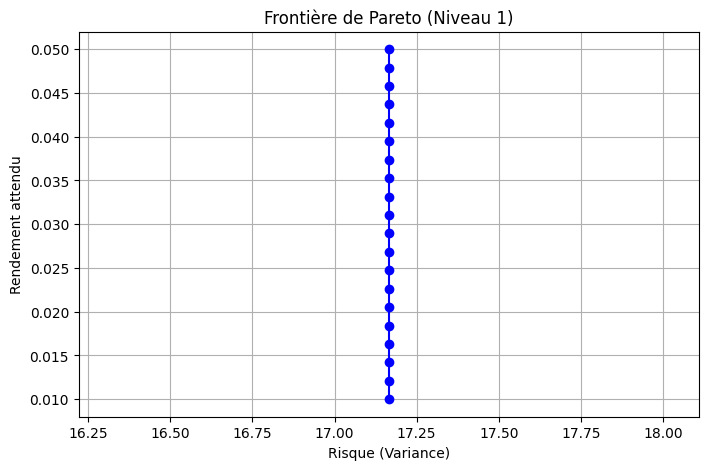

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(df_pareto['Risque'], df_pareto['Rendement'], marker='o', linestyle='-', color='blue')
plt.xlabel('Risque (Variance)')
plt.ylabel('Rendement attendu')
plt.title('Frontière de Pareto (Niveau 1)')
plt.grid(True)
plt.show()